# Habermans survival dataset

- Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.



In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [42]:
df = pd.read_csv("haberman.csv")

In [43]:
print(df.shape)

(305, 4)


In [44]:
df.columns = ['age','opyear','axil','survive_stat']

In [45]:
df['survive_stat'] = df['survive_stat'].replace([1],'Survived')
df['survive_stat'] = df['survive_stat'].replace([2],'Not Survived')

In [46]:
df.head()

,age,opyear,axil,survive_stat
0,30,62,3,Survived
1,30,65,0,Survived
2,31,59,2,Survived
3,31,65,4,Survived
4,33,58,10,Survived


# Observation:

-  There are 305 rows & 4 columns 
#### Each row contains:- 
    - 'Age': age of pateint at the time of operation
    - 'opyear': Patient's year of operation  
    - 'axil': Number of axillary nodes detected
    - 'survive_stat': Survival status of the patient. 
        -1 if patient survived 5  years or longer. 
        -2 if patient died within 5 year.
-  3 Independent variables



#### Axillary nodes:-

- The axillary lymph nodes or armpit lymph nodes are lymph nodes in the human armpit. Between 20 and 49 in number, they drain lymph vessels from the lateral quadrants of the breast, the superficial lymph vessels from thin walls of the chest and the abdomen above the level of the navel, and the vessels from the upper limb.

In [47]:
df["survive_stat"].value_counts()

Survived        224
Not Survived     81
Name: survive_stat, dtype: int64

In [48]:
df.describe()

,age,opyear,axil
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


# Objective:

     To find patient's survival who have undergone through Operation  

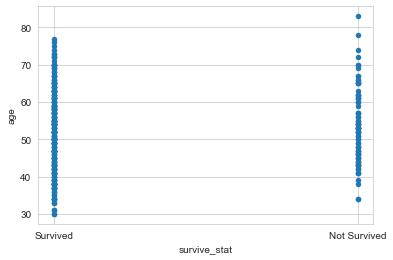

In [49]:
df.plot(kind='scatter',x='survive_stat',y='age');
plt.show()

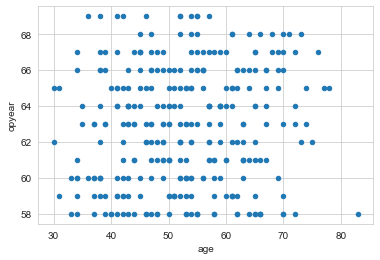

In [50]:
df.plot(kind='scatter',x='age',y='opyear');
plt.show()

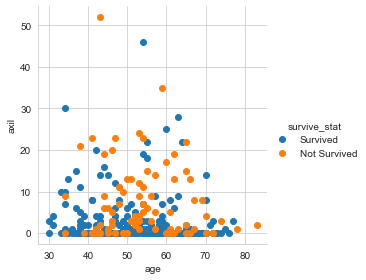

In [51]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survive_stat", height=4) \
   .map(plt.scatter, "age", "axil") \
   .add_legend();
plt.show();

- Age is not the factor of survival more than 5 year after operation
- But patient aged more than 80 not survived more than 5 year

# Pair-plots

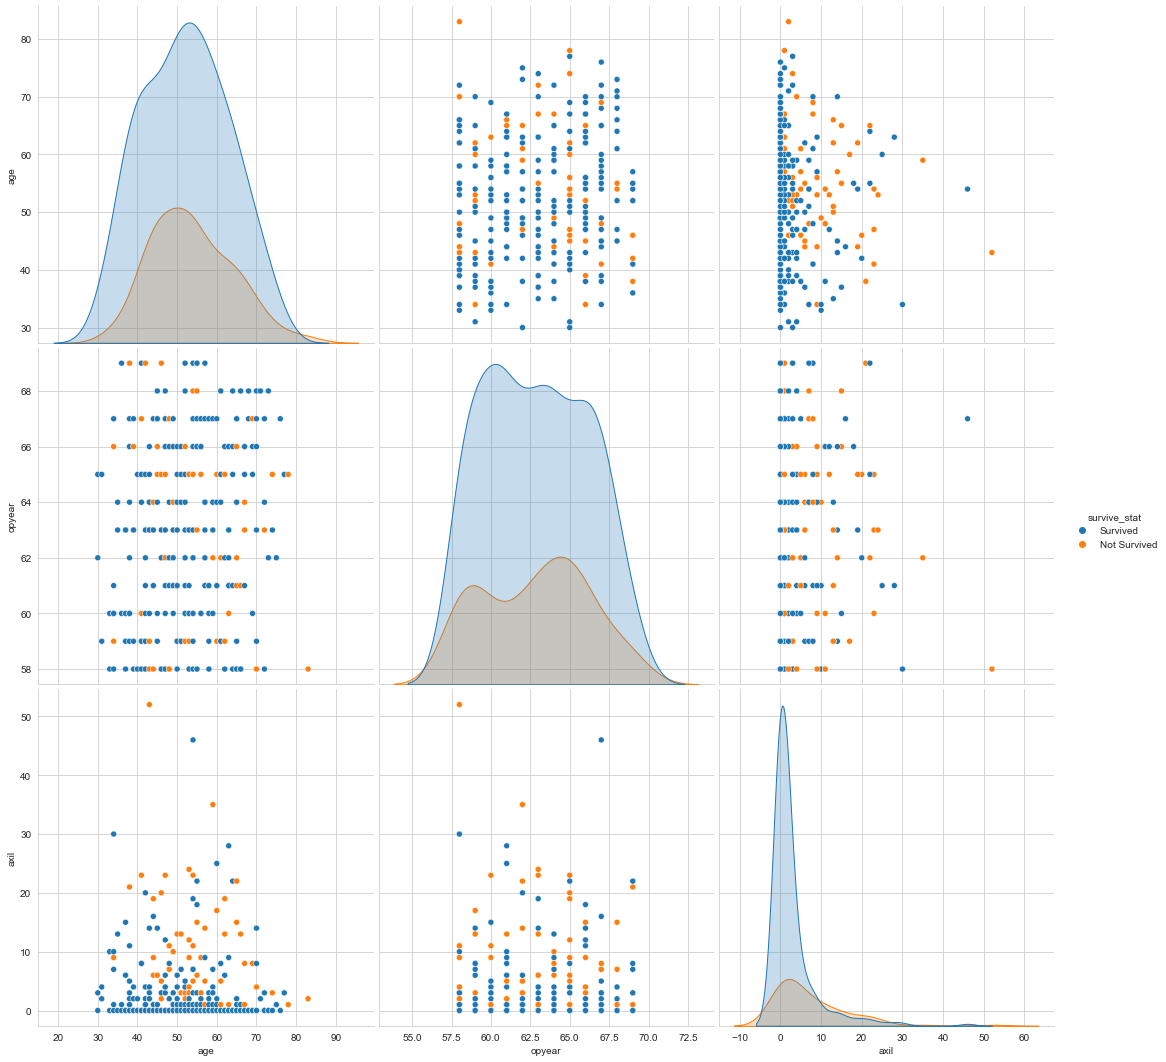

In [52]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="survive_stat", height=5);
plt.show()

- There is not any graph which is linearly seperable.

# Histogram , PDF

In [53]:
df_survived = df.loc[df['survive_stat'] == 'Survived']
df_not_survived = df.loc[df['survive_stat'] == 'Not Survived']


In [54]:
df_survived.describe()

,age,opyear,axil
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [55]:
df_not_survived.describe()

,age,opyear,axil
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


- The 75% patients who survived the operation have axillary nodes less than 3.
  & 75% patients who didn't survived the operation have less than 11 nodes.

- Mean value of axillary nodes between the survived & Not survived is 4.6  

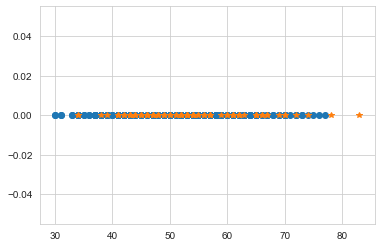

In [56]:
plt.plot(df_survived['age'], np.zeros_like(df_survived['age']), 'o')
plt.plot(df_not_survived['age'], np.zeros_like(df_not_survived['age']), '*')
plt.show()

# Univariate analysis

C:\Users\Shivanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shivanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


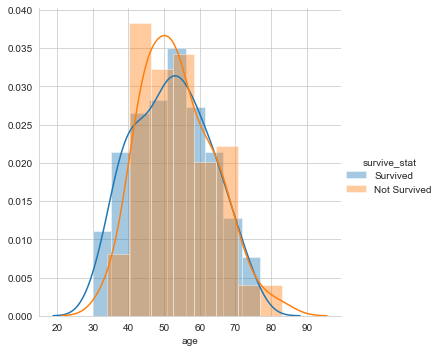

In [57]:
sns.FacetGrid(df, hue='survive_stat',height=5)\
    .map(sns.distplot, 'age') \
    .add_legend();
plt.show()

- Patients in age between 30-40 years have more chances of survival 

C:\Users\Shivanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shivanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


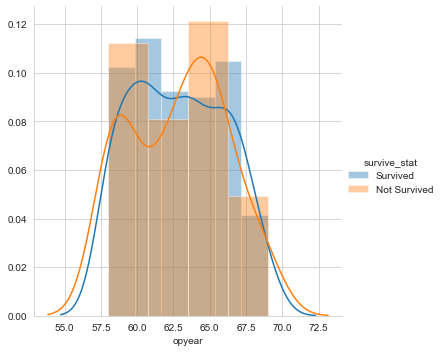

In [58]:
sns.FacetGrid(df, hue='survive_stat',height=5)\
    .map(sns.distplot, 'opyear') \
    .add_legend();
plt.show()

- Due to excess overlapping no conclusion can be made on the basis of year of Operarion 

C:\Users\Shivanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shivanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


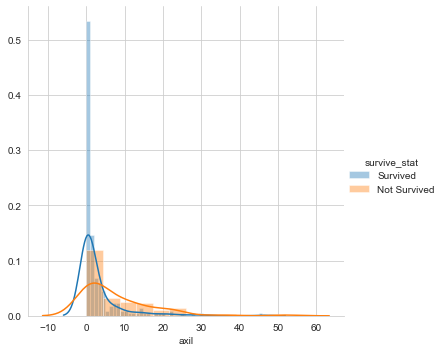

In [59]:
sns.FacetGrid(df, hue='survive_stat',height=5)\
    .map(sns.distplot, 'axil') \
    .add_legend();
plt.show()

- There is lot of Overlapping so, there not much that can be said but .
- The patients with axillary node less than 2 have more chance of survival.

# CDF

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


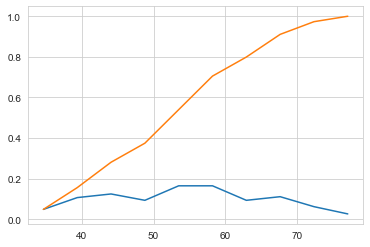

In [60]:
counts, edg = np.histogram(df_survived['age'],bins=10,density=True)

pdf = counts/sum(counts)

print(pdf)
print(edg)

cdf = np.cumsum(pdf)
plt.plot(edg[1:],pdf)
plt.plot(edg[1:], cdf)
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


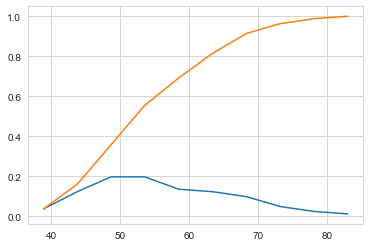

In [61]:
counts, edg = np.histogram(df_not_survived['age'],bins=10,density=True)

pdf = counts/sum(counts)

print(pdf)
print(edg)

cdf = np.cumsum(pdf)
plt.plot(edg[1:],pdf)
plt.plot(edg[1:], cdf)
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


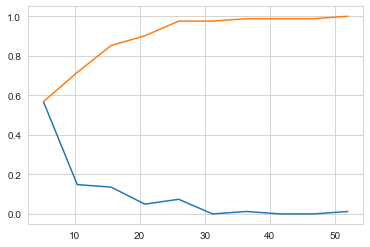

In [62]:
counts, edg = np.histogram(df_not_survived['axil'],bins=10,density=True)

pdf = counts/sum(counts)

print(pdf)
print(edg)

cdf = np.cumsum(pdf)
plt.plot(edg[1:],pdf)
plt.plot(edg[1:], cdf)
plt.show()

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


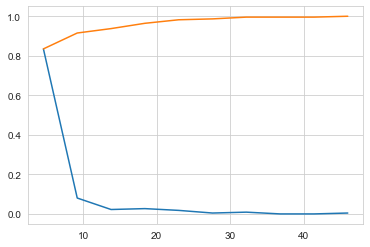

In [63]:
counts, edg = np.histogram(df_survived['axil'],bins=10,density=True)

pdf = counts/sum(counts)

print(pdf)
print(edg)

cdf = np.cumsum(pdf)
plt.plot(edg[1:],pdf)
plt.plot(edg[1:], cdf)
plt.show()

# Box plot

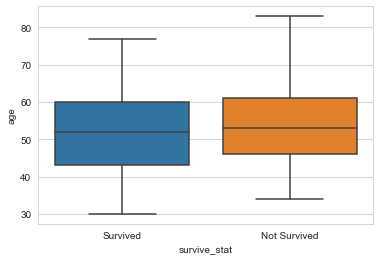

In [64]:
sns.boxplot(x='survive_stat',y='age',data=df)
plt.show()

More overlap is visible in the graph of Surviving and Not surviving patients.
The 25,50,75 percentile are also almost identical.
so, the conclusion can't be done on the age of the patient.

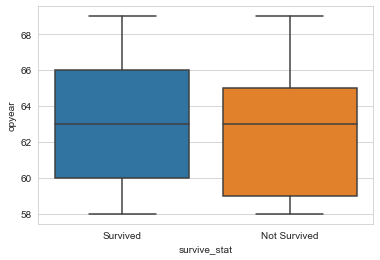

In [65]:
sns.boxplot(x='survive_stat',y='opyear',data=df)
plt.show()

- There is huge overlap in the survived and not survived patients .
- the 25% , 50% & 75% also have same values.


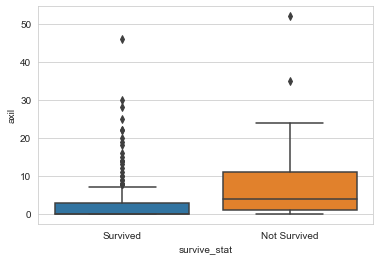

In [66]:
sns.boxplot(x='survive_stat',y='axil',data=df)
plt.show()

- Axillary nodes have many outliers.
- All survived patients have axillary nodes less than 10
- And patients who didn't survived have axillary nodes less than 24(Apprx.)
- 75% of the patients who survived have less than 4 nodes &
- 50% non-survivers have axillary nodes less than 5 & more than 5

###### It makes clear that number of Axillary nodes is the parameter for Cancer Survival prediction

# Violin plot

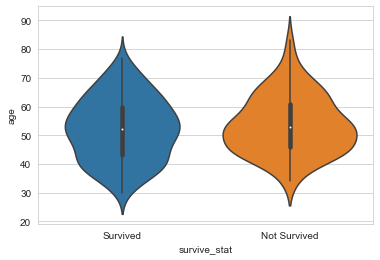

In [67]:
sns.violinplot(x="survive_stat", y="age", data=df, size=8)
plt.show()

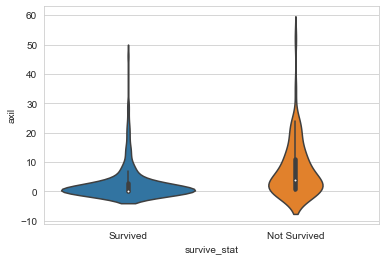

In [68]:
sns.violinplot(x="survive_stat", y="axil", data=df, size=8)
plt.show()

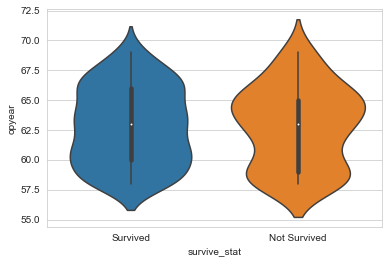

In [69]:
sns.violinplot(x="survive_stat", y="opyear", data=df, size=8)
plt.show()

# Mean , Stddev..

In [70]:
print("Means")
print(np.mean(df_survived['age']))
print(np.mean(df_not_survived['age']))


print("\nStd-dev")
print(np.std(df_survived['age']))
print(np.std(df_not_survived['age']))

Means
52.11607142857143
53.67901234567901

Std-dev
10.913004640364269
10.10418219303131


In [72]:
print("Means")
print(np.mean(df_survived['axil']))
print(np.mean(np.append(df_survived['axil'],50)))
print(np.mean(df_not_survived['axil']))


print("\nStd-dev")
print(np.std(df_survived['axil']))
print(np.std(df_not_survived['axil']))

Means
2.799107142857143
3.008888888888889
7.45679012345679

Std-dev
5.869092706952767
9.128776076761632


# Conclusion:-

- Age is not the factor for the survival.
- but 80+ year patient not suvived after operation
- Patients between the age of 30-40 have more chance of survival
- Axillary nodes have many outliers
- Patients having axillary nodes less 4 have 75% more chances of survival
- Among the 3 features number Axillary nodes is more relevant for the prediction of cancer survival followed by Age & Patient's year of operation.
